#Bienvenidos a la mentoría: 
##"Ciencia de datos aplicada al estudio de la Obesidad y otras enfermedades crónicas en Córdoba."


##### Como primer objetivo proponemos acercarnos a la temática propuesta presentando una breve introducción de la misma y sus posibles determinantes.


##Descripción del problema
La obesidad es una enfermedad crónica multicausal de alta prevalencia en el mundo y Argentina. La misma se encuentra en constante aumento y en Córdoba son más del 50% las personas que presentan exceso de peso, y un 25% del total obesidad. Si bien se piensa que los principales factores que influyen en su desarrollo, son un nivel de actividad física inadecuado, el sedentarismo y una alimentación poco saludable, pueden existir otros determinantes de esta condición que deban ser considerados. Sin embargo, muchas veces es difícil contar con todos estos datos y analizarlos de manera conjunta  o considerando su efecto sinérgico.
Por otra parte, al conocer los aspectos que más influyen en la ocurrencia de esta enfermedad se podría abordar de manera integral y ofrecer a la población información, realizar recomendaciones y utilizar estos resultados para implementar políticas públicas para enfrentar la pandemia de la obesidad.
Así, en esta mentoría poneo a dispoición un dataset que tiene una numerosa variedad de features las cuales permitirán poder seleccionar aquellos que sean los mejores predictores para la enfermedad. También identificar patrones de alimentación y subgrupos de sujetos que compartan ciertas características, y de esta forma descubrir nuevos insights para desarrollar.   
Además, resulta interesante desarrollar metodologías para analizar y describir este problema, las que pueden ser replicadas en otros de las Ciencias de la salud y en el que se utilicen principalmente las herramientas que la Ciencia de Datos provee.
Esperamos que en esta mentoría puedas desarrollar y aplicar todas las herramientas y skills aprendidas durante el cursado de la diplomatura. Te proponemos objetivos específicos para la resolución de cada práctico poniendo en juego tus conocimientos y creatividad, y quién te dice encontras tu lado Abby Sciuto/John Snow. 


##Motivación
❖	¿Cuáles son las principales características de la población de Córdoba en cuanto a sus determinantes bio-socio-económicos?

❖	¿Es la obesidad una enfermedad que depende meramente de la alimentación de los sujetos?

❖	¿Cuáles son los factores alimentarios que promueven el desarrollo de la enfermedad?¿Y cuáles son aquellos que protegen?

❖	¿Se encuentra la obesidad asociada a la enfermedad cardiovascular?¿y al cáncer?

❖	¿Qué variables ayudarían a predecir el estado nutricional de un sujeto de la población de Córdoba?

❖	¿Cuáles son las características más visibles de los grupos según su estado nutricional?¿Existen características comunes que nos permitan predecir el estado nutricional que tendrá una persona?

❖	¿Existe algún patrón alimentario característico por grupos según la presencia o no de obesidad?




##Conociendo el dataset...
Nuestra base de datos cuenta con 4292 observaciones y 239 variables. Para descargar la base pueden ingresar a el [github](https://github.com/Mentoria-obesidad/obesidad_data/blob/master/Base%20obesidad%20%20Mentor%C3%ADa.dta) armado para esta mentoría. Por otro lado, al ser muchas las variables y algunas de ellas bastante complejas se creó un documento con el nombre de cada variable, su definición y codificación, que pueden observar en el siguiente [link.](https://github.com/Mentoria-obesidad/obesidad_data/blob/master/Codificaci%C3%B3n%20mentor%C3%ADa..docx.pdf)

#Para comenzar a trabajar sobre el dataset cargamos algunas de las librerías importantes para la materia "Análisis y Visualización".

In [ ]:
from google.colab import files
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

##El siguiente código es necesario para cargar en esta notebook el dataset. Para ello, es necesario descargarlo previamente, conocer el directorio donde se alojará y mantener el nombre original para que la próxima celda de código funcione correctamente.


In [ ]:
encuestas = files.upload()

Saving Base obesidad Mentoría.dta to Base obesidad Mentoría (7).dta


In [ ]:
obedf = pd.read_stata("Base obesidad Mentoría (7).dta")
pd.set_option('display.max_columns', 10)
obedf.head()

,n_encuesta,dia,mes,est,ecar,...,Kr,acúrf,acúrr,Ncomr,id
0,1,6,11,4,2,...,1902.34,431.19,875.75,4.0,1.0
1,2,6,11,4,1,...,1834.77,530.22,753.23,5.0,2.0
2,3,6,11,4,2,...,2321.60,481.01,935.28,4.0,3.0
3,4,6,11,4,1,...,0.00,295.65,0.00,0.0,4.0
4,5,7,11,4,1,...,0.00,539.30,0.00,0.0,5.0


In [ ]:
obedf.shape

(4292, 239)

###Cantidad de personas encuestadas según sexo

In [ ]:
#yo
obedf['IMC']

0       39.393079
1       21.048048
2       34.000000
3       23.243408
4       21.875000
          ...    
4287    26.775510
4288    24.088223
4289    27.555556
4290    23.888441
4291    26.446281
Name: IMC, Length: 4292, dtype: float64

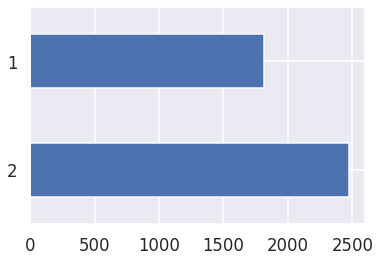

In [ ]:
obedf['sexo'].value_counts().plot(kind='barh')
#1 corresponde a hombres y 2 a mujeres

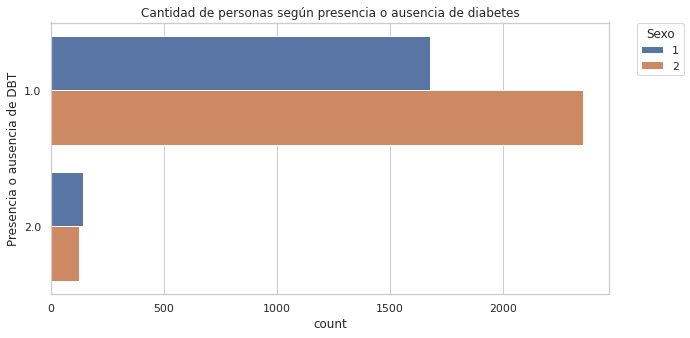

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.countplot(y='dbt', hue='sexo', data=obedf)
plt.title('Cantidad de personas según presencia o ausencia de diabetes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Sexo')
plt.ylabel('Presencia o ausencia de DBT')
plt.show()
#1 indica ausencia y 2 indica presencia

###Cantidad de personas encuestadas según Nivel Socioeconómico

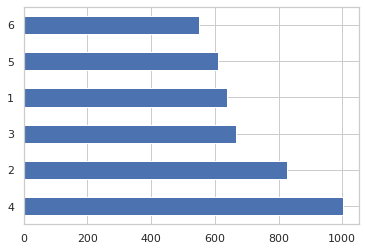

In [ ]:
obedf['nes'].value_counts().plot(kind='barh')
#1 alto, 2 medio alto, 3 medio típico, 4 bajo superior, 5 bajo inferior y 6 marginal.

##Calculamos la FDP:

In [ ]:
fdps = obedf['nes'].value_counts(normalize=True)
fdps

4    0.233225
2    0.192917
3    0.155405
1    0.148649
5    0.141892
6    0.127912
Name: nes, dtype: float64

In [ ]:
#yo
fdps.reset_index()

,index,nes
0,4,0.233225
1,2,0.192917
2,3,0.155405
3,1,0.148649
4,5,0.141892
5,6,0.127912


In [ ]:
#yo
fdps.to_frame()

,nes
4,0.233225
2,0.192917
3,0.155405
1,0.148649
5,0.141892
6,0.127912


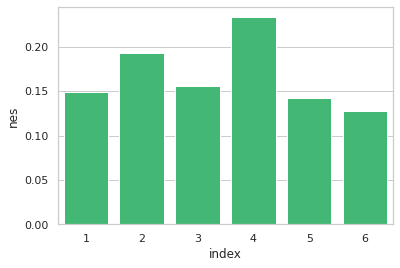

In [ ]:
#yo
ax = sns.barplot(data=fdps.to_frame().reset_index(), x='index', y='nes', color='#2ecc71')

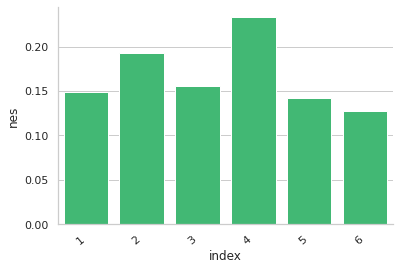

In [ ]:
ax = sns.barplot(data=fdps.to_frame().reset_index(), x='index', y='nes', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine()

# **Práctico N°1**           **Análisis y visualización**

## Objetivo y alcance

En esta primera aproximación se pretende comenzar por analizar el conjunto de datos, con el objetivo general de poder conocer las principales características de nuestra población, y su distribución entre subgrupos. De esta forma se pueden presentar los resultados obtenidos, poder plantear posibles relaciones entre variables a través de visualizaciones adecuadas.



##Parte I
Elegir cinco variables del dataset: 
- Analizar los estadísticos clásicos según la naturaleza y distribución de la variable (media, moda, mediana, desviación estándar, etc). 
- Realizar descripción de ellas de manera univariada y en relación a otras a través de la construcción de tablas y gráficos acordes a la naturaleza de cada una.
- Calcular la FDP de dichas variables.Calcular correlaciones entre variables, entre otras posibilidades a elección. 
- Analizar outliers.

##Parte II
Describir al menos un insight acompañado por su gráfico. Ej: 

¿Cuál es la probabilidad de que una persona tenga obesidad y pertenezca al nivel socioeconómico bajo? ¿y al alto?

Plantee otros interrogantes si los desea.


## Estructura del informe
El informe debe estar en un formato que no sea Jupyter Notebook, por ejemplo .html, .pdf, .md. El objetivo es poder redactar y justificar las conclusiones obtenidas a partir de las preguntas disparadoras, utilizando material gráfico y/o interactivo como soporte para complementar las ideas. 
Además, se debe presentar o enviar la notebook en donde se trabajó (jupyter notebook, colab notebook, etc).  

###Se evaluarán los siguientes aspectos:
Que se apliquen los conceptos vistos en el dictado de la materia.

El informe debe tener un mensaje claro y debe presentarse en un formato legible para cualquier tipo de stakeholder.

Que los cálculos estadísticos sean utilizados solo como herramientas para responder a las consignas.

Indicar el criterio aplicado al momento de elegir las variables a analizar.

## Deadline pautado para la entrega: Lunes 29/06/2020

## Recursos de interés:  
*   [Galerías de seaborn](https://seaborn.pydata.org/examples/index.html)
*   [Plotly](https://plotly.com/python/)
*   [Otra página](https://python-graph-gallery.com/) con galerías de gráficos.



# RESPUESTAS - GRUPO 2


```
# This is formatted as code
```



In [ ]:
obedf.head()


,n_encuesta,dia,mes,est,ecar,...,Kr,acúrf,acúrr,Ncomr,id
0,1,6,11,4,2,...,1902.34,431.19,875.75,4.0,1.0
1,2,6,11,4,1,...,1834.77,530.22,753.23,5.0,2.0
2,3,6,11,4,2,...,2321.60,481.01,935.28,4.0,3.0
3,4,6,11,4,1,...,0.00,295.65,0.00,0.0,4.0
4,5,7,11,4,1,...,0.00,539.30,0.00,0.0,5.0


### Las 5 variables elegidas
1. sexo : 1- masc; 2- fem
2. IMC: va continua
3. eent: educación del entrevistado
1- primario incompleto, 2- primario completo, 3- secundario incompleto, 4- secundario completo, 5- terciario, 6- universitario, 7- postgrado, 8- terciario incompleto, 9- universitario incompleto.
4. actfis:  1- no; 2- si
5. edad: va continua

## Creamos el Dataset con las columnas de interes

In [ ]:
col_int=["sexo","IMC","eent","actfis","edad"] #columnas de interés
ds=obedf[col_int]
ds.head() #ds será el dataset con las columnas de interes.

,sexo,IMC,eent,actfis,edad
0,2,39.393079,2,1.0,56
1,2,21.048048,6,2.0,29
2,2,34.000000,1,2.0,61
3,1,23.243408,1,1.0,80
4,2,21.875000,3,1.0,21


In [ ]:
ds.shape

(4292, 5)

## PARTE 1

1.   Analizar los estadísticos clásicos según la naturaleza y distribución de la variable (media, moda, mediana, desviación estándar, etc).
2.   Realizar descripción de ellas de manera univariada y en relación a otras a través de la construcción de tablas y gráficos acordes a la naturaleza de cada una.
3. Calcular la FDP de dichas variables.*histograma*
4. Calcular correlaciones entre variables, entre otras posibilidades a elección. *pairplot*
5. Analizar outliers. *boxplot*

In [ ]:
def estadistico(dataset): #Media, mode, Median & STD, min, max
    dict={}
    for i in dataset.columns:
        w_mean=dataset[i].mean() 
        w_median=dataset[i].median()
        w_mode=dataset[i].mode()
        w_std=dataset[i].std()
        w_max=dataset[i].max()
        w_min=dataset[i].min()
        if i == "sexo":
          continue
        if i == "actfis":
          continue    
        dict[i]=w_mean,w_median,float(w_mode),w_std,w_max, w_min
    #print(dict)
    return pd.DataFrame(dict, index=["Media","Mediana","Moda","Desv Estandar","Max","Min"])

#se puede resolver con un describe() pero asi queda mas presentable y todos juntos en la tabla.

#ds.describe()

In [ ]:
estadistico(ds)

,IMC,eent,edad
Media,25.822067,3.900979,42.659832
Mediana,25.103878,4.000000,41.000000
Moda,22.773186,4.000000,23.000000
Desv Estandar,4.778161,1.490349,17.947990
Max,51.111111,9.000000,97.000000
Min,14.764616,1.000000,18.000000


In [ ]:
tabla1=estadistico(ds)
tabla1.to_excel (r'D:\Bibliotecas\Documents\table1.xlsx', index = True, header=True)

In [ ]:
def estadistico_binario(dataset): #mode, Median & STD, min, max
    dict={}
    for i in dataset.columns:
        w_median=dataset[i].median()
        w_mode=dataset[i].mode()
        w_max=dataset[i].max()
        w_min=dataset[i].min()
        if i == "IMC":
          continue
        if i == "eent":
          continue
        if i == "edad":
          continue  
        dict[i]=w_median,float(w_mode),w_max, w_min
    #print(dict)
    return pd.DataFrame(dict, index=["Mediana","Moda","Max","Min"])

In [ ]:
estadistico_binario(ds)

,sexo,actfis
Mediana,2.0,1.0
Moda,2.0,1.0
Max,2.0,2.0
Min,1.0,1.0


In [ ]:
tabla2=estadistico_binario(ds)
tabla2.to_excel (r'D:\Bibliotecas\Documents\table2.xlsx', index = True, header=True)

Conclusiones 
IMC: el promedio de la muestra poblacional es 25.8 kg/m2, que corresponde a IMC de preobesidad (24,9 - 29,9 kg/m2). EL valor más frecuente, moda, es 22.7 kg/m2, que corresponde a IMC normal (18,4-24,9 kg/m2).
edad: La edad promedio es de 42,6 años, mientras que la edad más frecuente de la población es 23 años. La dispersión de los datos es bastante grande, pero esto es acorde al amplio rango de edades de la población (18-97 años).
eent: el secundario completo es la educación alcanzada lo más frecuente, valor 4.
sexo: En nuestro dataset, lo más frecuente es el valor 2.0, que indica que las personas son de sexo femenino. 
actfis: No realizar actividad física es lo más frecuente, el valor 1.0, en nuestra población de estudio. 


## **SEXO**

,index,sexo,sex
0,2,2475,Mujer
1,1,1817,Hombre


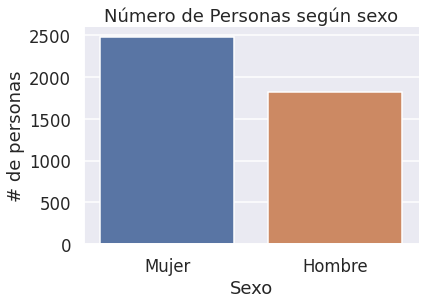

In [ ]:
ds_sex=ds.sexo.value_counts().reset_index()
ds_sex["sex"]=["Mujer", "Hombre"]


sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds_sex, x="sex", y="sexo") #(data=ds, x=sexo)
plt.title("Número de Personas según sexo")
sns.despine()
plt.xlabel('Sexo')
plt.ylabel("# de personas")
#plt.savefig("abc.png")
#files.download("abc.png") 

ds_sex


In [ ]:
ds_sex.to_excel (r'D:\Bibliotecas\Documents\00 BIOINFORMATICA\FAMAF - Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones\00 Mentoria\1.xlsx', index = False, header=True)

,index,sexo,sex
0,2,0.576654,Mujer
1,1,0.423346,Hombre


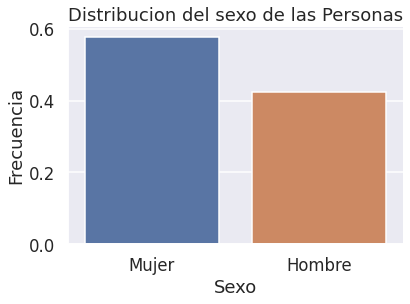

In [ ]:
n_ds_sex=ds.sexo.value_counts(normalize=True).reset_index()
n_ds_sex["sex"]=["Mujer", "Hombre"]


sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=n_ds_sex, x="sex", y="sexo") #(data=ds, x=sexo)
plt.title("Distribucion del sexo de las Personas")
sns.despine()
plt.xlabel('Sexo')
plt.ylabel("Frecuencia")

n_ds_sex #FDP

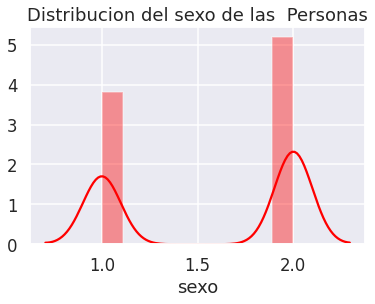

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
plt.title("Distribucion del sexo de las  Personas")
sns.distplot(ds.sexo, label="sexo", color="red" ) #¿ tiene sentido?


## ENNT

,index,eent,educ
5,1,275,primario incompleto
2,2,615,primario completo
3,3,439,secundario incompleto
0,4,1787,secundario completo
4,5,371,terciario
1,6,773,universitario
7,7,4,postgrado
6,9,28,universitario incompleto


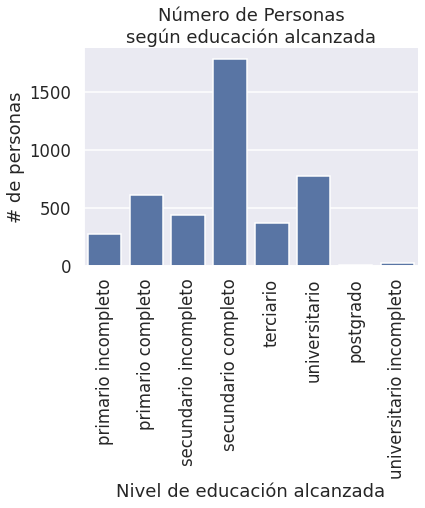

In [ ]:
ds_ee=ds.eent.value_counts().reset_index().sort_values(by=["index"])
ds_ee["educ"]=["primario incompleto", "primario completo", "secundario incompleto", "secundario completo", "terciario", "universitario", "postgrado", "universitario incompleto"]

sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds_ee, x="educ", y="eent", color="b")
plt.title("Número de Personas\nsegún educación alcanzada")
sns.despine()
plt.xlabel('Nivel de educación alcanzada')
plt.ylabel("# de personas")
plt.xticks(rotation=90)


ds_ee

,index,eent,educ
5,1,0.064073,primario incompleto
2,2,0.143290,primario completo
3,3,0.102283,secundario incompleto
0,4,0.416356,secundario completo
4,5,0.086440,terciario
1,6,0.180103,universitario
7,7,0.000932,postgrado
6,9,0.006524,universitario incompleto


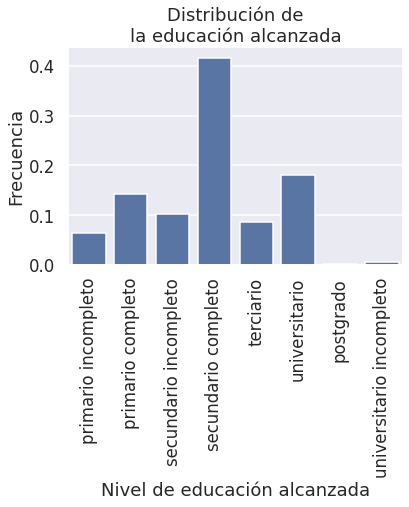

In [ ]:
n_dseent=ds.eent.value_counts(normalize=True).reset_index().sort_values(by=["index"])
n_dseent["educ"]=["primario incompleto", "primario completo", "secundario incompleto", "secundario completo", "terciario", "universitario", "postgrado", "universitario incompleto"]


sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=n_dseent, x="educ", y="eent", color="b")
plt.title("Distribución de\nla educación alcanzada")
plt.xlabel('Nivel de educación alcanzada')
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)

n_dseent

Legenda:
1-primario incompleto
2-primario completo
3-secundario incompleto
4-secundario completo
5-terciario
6-universitario
7-postgrado
9-universitario incompleto


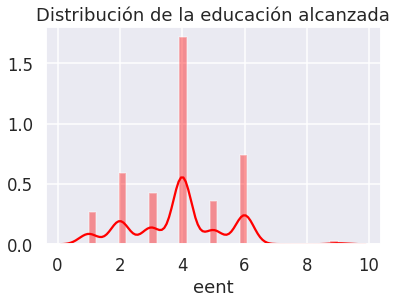

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
plt.title("Distribución de la educación alcanzada")
sns.distplot(ds.eent, color="red" ) #¿ tiene sentido?
plt.xlim()
print("Legenda:\n1-primario incompleto\n2-primario completo\n3-secundario incompleto\n4-secundario completo\n5-terciario\n6-universitario\n7-postgrado\n9-universitario incompleto")

## Edad

In [ ]:
ds.edad.describe()

count    4292.000000
mean       42.659832
std        17.947990
min        18.000000
25%        26.000000
50%        41.000000
75%        57.000000
max        97.000000
Name: edad, dtype: float64

,index,edad
0,23,171
1,18,146
2,25,137
3,19,132
4,24,120
...,...,...
70,92,1
71,85,1
72,89,1
73,90,1


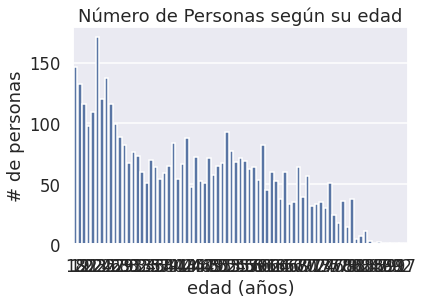

In [ ]:
ds_ed=ds.edad.value_counts().reset_index()

sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds_ed, x="index", y="edad", color="b")
plt.title("Número de Personas según su edad")
plt.xlabel('edad (años)')
plt.ylabel("# de personas")

ds_ed


In [ ]:
#Son muchos valores de edad, hago una segmentacion de 8  intervalos y lo agrego a la tabla ds

edad_segment=pd.cut(ds.edad, 8, labels=["18-27", "28-37", "38-47", "48-57", "58-67", "68-77", "78-87", "88-97"]) 
ds['i_edad'] = edad_segment
ds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sexo,IMC,eent,actfis,edad,i_imc,i_edad
0,2,39.393079,2,1.0,56,35-39.9,48-57
1,2,21.048048,6,2.0,29,18.5-24.9,28-37
2,2,34.000000,1,2.0,61,30-34.9,58-67
3,1,23.243408,1,1.0,80,25-29.9,78-87
4,2,21.875000,3,1.0,21,18.5-24.9,18-27
...,...,...,...,...,...,...,...
4287,1,26.775510,2,1.0,72,25-29.9,68-77
4288,2,24.088223,4,2.0,72,25-29.9,68-77
4289,2,27.555556,2,2.0,53,25-29.9,48-57
4290,1,23.888441,4,2.0,61,25-29.9,58-67


In [290]:
ds[ds.i_edad == "38-47"].sort_values(by=['edad'])

,sexo,IMC,eent,actfis,edad,i_imc,i_edad
2043,2,28.359375,4,1.0,38,"(24.9, 29.9]",38-47
749,2,23.956279,3,1.0,38,"(18.5, 24.9]",38-47
2468,2,23.554687,6,1.0,38,"(18.5, 24.9]",38-47
2479,2,24.218750,6,1.0,38,"(18.5, 24.9]",38-47
2483,2,22.883812,4,1.0,38,"(18.5, 24.9]",38-47
...,...,...,...,...,...,...,...
2106,1,26.782007,5,1.0,47,"(24.9, 29.9]",38-47
282,1,31.085714,6,1.0,47,"(29.9, 34.9]",38-47
857,2,27.120867,4,2.0,47,"(24.9, 29.9]",38-47
3412,1,31.074158,5,1.0,47,"(29.9, 34.9]",38-47


,index,i_edad
0,18-27,1244
1,48-57,700
2,28-37,686
3,38-47,638
4,58-67,521
5,68-77,382
6,78-87,115
7,88-97,6


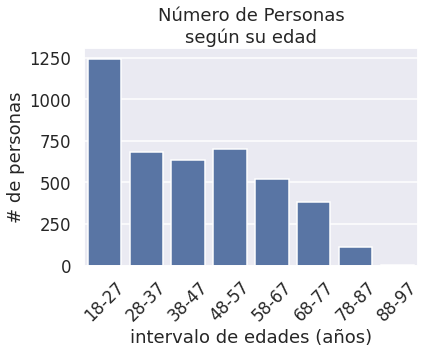

In [ ]:
ds_ied=ds.i_edad.value_counts().reset_index()

sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds_ied, x="index", y="i_edad", color="b")
plt.title("Número de Personas\nsegún su edad")
plt.xlabel('intervalo de edades (años)')
plt.ylabel("# de personas")
plt.xticks(rotation=45)

ds_ied

,index,i_edad
0,18-27,0.289842
1,48-57,0.163094
2,28-37,0.159832
3,38-47,0.148649
4,58-67,0.121389
5,68-77,0.089003
6,78-87,0.026794
7,88-97,0.001398


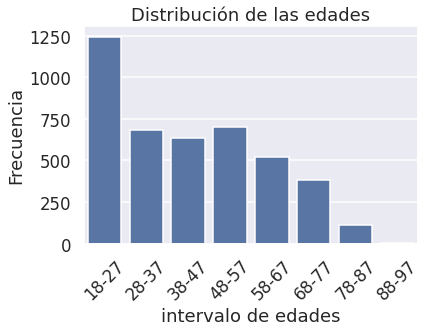

In [ ]:
n_ds_ied=ds.i_edad.value_counts(normalize=True).reset_index()

sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds_ied, x="index", y="i_edad", color="b")
plt.title("Distribución de las edades")
plt.xlabel('intervalo de edades')
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)

n_ds_ied

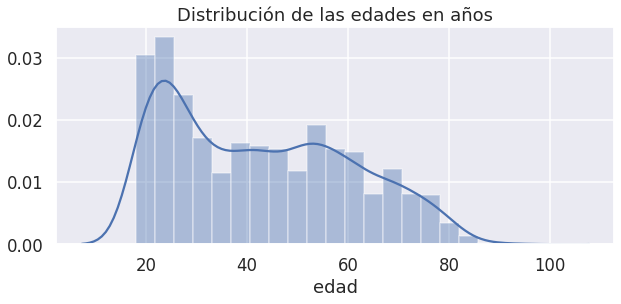

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
plt.figure(figsize=(10,4))
plt.title("Distribución de las edades en años")
sns.distplot(ds.edad, color="b" ) #con el iuntervalo no funciona.


In [ ]:
ds.dtypes

sexo          int8
IMC        float64
eent          int8
actfis     float64
edad          int8
i_imc     category
i_edad    category
dtype: object

## IMC

In [ ]:
ds_imc=ds.IMC.value_counts().reset_index()

sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds_imc, x="index", y="IMC", color="b")
plt.title("Número de Personas según su IMC")
plt.xlabel('IMC (Kg/m2)')
plt.ylabel("# de personas") #Tarda una banda en cargar porque son muchos datos diferentes (3175)

ds_imc

,index,IMC
0,22.773186,10
1,19.531250,9
2,25.951557,9
3,21.303949,8
4,20.307412,8
...,...,...
3171,20.238751,1
3172,22.782585,1
3173,40.903686,1
3174,24.373709,1


Imposible de leer!!!

In [227]:
#Hago una segmentacion de 5  intervalos y lo agrego a la tabla ds
#[(0, 1), (2, 3), (4, 5)]) ["18.4","18.5-24.9","25-29.9","30-34.9",">35", ">40"])
bins = pd.IntervalIndex.from_tuples([(0,18.5),(18.5,24.9),(24.9,29.9),(29.9,34.9),(34.9,40),(40,52)])
imc_segment=pd.cut(ds.IMC, bins)
ds['i_imc'] = imc_segment
ds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,sexo,IMC,eent,actfis,edad,i_imc,i_edad
0,2,39.393079,2,1.0,56,"(34.9, 40.0]",48-57
1,2,21.048048,6,2.0,29,"(18.5, 24.9]",28-37
2,2,34.000000,1,2.0,61,"(29.9, 34.9]",58-67
3,1,23.243408,1,1.0,80,"(18.5, 24.9]",78-87
4,2,21.875000,3,1.0,21,"(18.5, 24.9]",18-27
...,...,...,...,...,...,...,...
4287,1,26.775510,2,1.0,72,"(24.9, 29.9]",68-77
4288,2,24.088223,4,2.0,72,"(18.5, 24.9]",68-77
4289,2,27.555556,2,2.0,53,"(24.9, 29.9]",48-57
4290,1,23.888441,4,2.0,61,"(18.5, 24.9]",58-67


In [228]:
ds.i_imc.value_counts()

(18.5, 24.9]    1982
(24.9, 29.9]    1503
(29.9, 34.9]     526
(34.9, 40.0]     148
(0.0, 18.5]       79
(40.0, 52.0]      54
Name: i_imc, dtype: int64

In [221]:
ds.shape

(4292, 7)

,index,IMC
0,22.773186,10
1,19.531250,9
2,25.951557,9
3,21.303949,8
4,20.307412,8
...,...,...
3171,20.238751,1
3172,22.782585,1
3173,40.903686,1
3174,24.373709,1


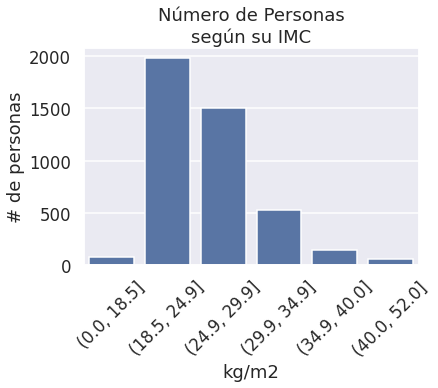

In [229]:
ds_iimc=ds.i_imc.value_counts().reset_index()

sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds_iimc, x="index", y="i_imc", color="b")
plt.title("Número de Personas\nsegún su IMC")
plt.xlabel('kg/m2')
plt.ylabel("# de personas")
plt.xticks(rotation=45)

ds_imc

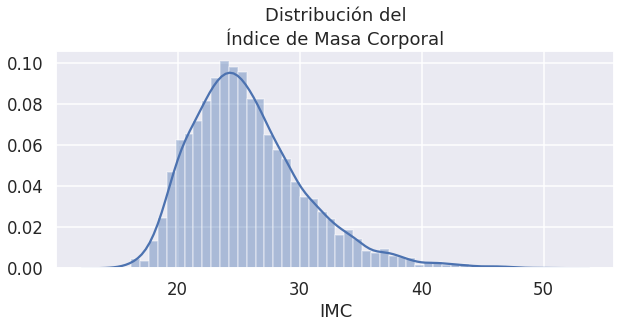

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
plt.figure(figsize=(10,4))
plt.title("Distribución del\nÍndice de Masa Corporal")
sns.distplot(ds.IMC, color="b" )

## Actividad Fisica

,index,actfis,af
0,1.0,2241,No hace actfis
1,2.0,2050,Si hace actfis


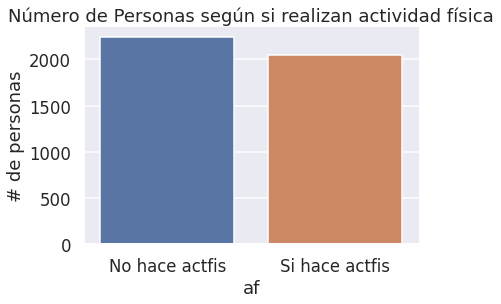

In [ ]:
ds_af=ds.actfis.value_counts().reset_index()
ds_af["af"]=["No hace actfis", "Si hace actfis"]


sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds_af, x="af", y="actfis") #(data=ds, x=sexo)
plt.title("Número de Personas según si realizan actividad física")
sns.despine()
plt.ylabel("# de personas")

ds_af

,index,actfis,af
0,1.0,0.522256,No hace actfis
1,2.0,0.477744,Si hace actfis


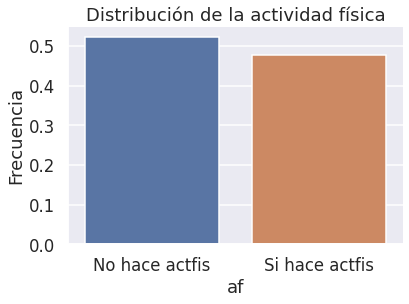

In [ ]:
n_ds_af=ds.actfis.value_counts(normalize=True).reset_index()
n_ds_af["af"]=["No hace actfis", "Si hace actfis"]


sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=n_ds_af, x="af", y="actfis") #(data=ds, x=sexo)
plt.title("Distribución de la actividad física")
sns.despine()
plt.ylabel("Frecuencia")

n_ds_af

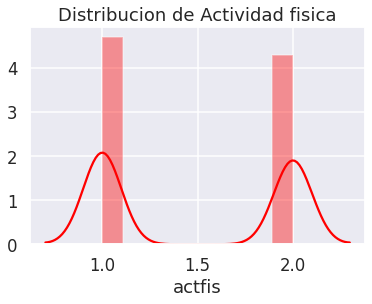

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
plt.title("Distribucion de Actividad fisica")
sns.distplot(ds.actfis, color="red" )

#Busqueda de outliers - Sexo y actfis son binarios!
IMC

count    4292.000000
mean       25.822067
std         4.778161
min        14.764616
25%        22.491349
50%        25.103878
75%        28.383027
max        51.111111
Name: IMC, dtype: float64

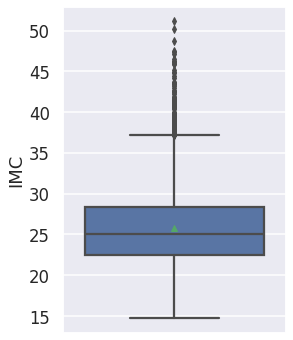

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(data=ds,y='IMC',showmeans=True, color="b")
ds.IMC.describe()

In [ ]:
a= 4.778161*2.5
(ds.IMC.mean()+ds.IMC.std()*2.5) #limite superior

37.76746922131852

In [ ]:
def clean_outliers(interesting_col):
    mask_outlier = (numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return ds[mask_outlier]

In [ ]:
clean_out_ds=clean_outliers(ds.IMC)
clean_out_ds

clean_out_ds.IMC.max(), clean_out_ds.IMC.min()

(37.61253462603878, 14.764616454946017)

count    4292.000000
mean       42.659832
std        17.947990
min        18.000000
25%        26.000000
50%        41.000000
75%        57.000000
max        97.000000
Name: edad, dtype: float64

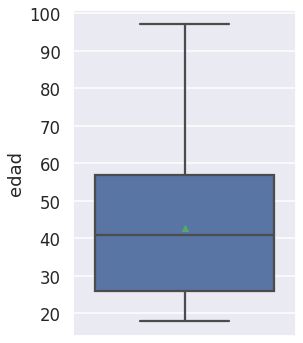

In [ ]:
#edad

plt.figure(figsize=(4,6))
sns.boxplot(data=ds,y='edad',showmeans=True, color="b")
ds.edad.describe() # Para mi sorpresa no hay outlier!

count    4292.000000
mean        3.900979
std         1.490349
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: eent, dtype: float64

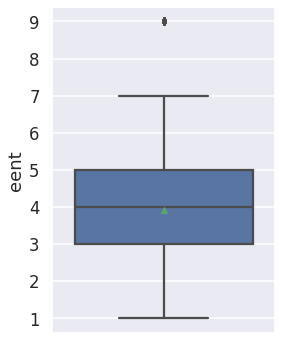

In [ ]:
#eent
plt.figure(figsize=(4,6))
sns.boxplot(data=ds,y='eent',showmeans=True, color="b")
ds.eent.describe() ## outlies!

## Insight
### ¿Que relacion existe entre un persona con un IMC Normal y su estudios alcanzados: primaria completa, secundario completo y universitario? ¿ y si esto lo filtramos por sexo?

Text(0.5, 0, 'Educacion alcanzada')

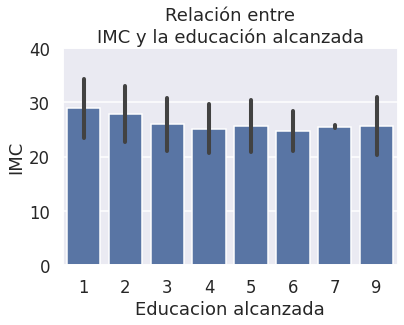

In [339]:
plt.title("Relación entre\nIMC y la educación alcanzada")
plt.xlabel('Tipo de educacion alcanzada')
plt.ylabel("IMC")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds, x="eent", y= "IMC", color="b", ci="sd")
plt.ylim(0,40)
plt.xlabel("Educacion alcanzada")

#A primera vista vemos que la media del IMC de las personas con solo primario completo, es mayor comparada a todos los otros grupos.

In [340]:
ds.groupby("eent").mean()

,sexo,IMC,actfis,edad
eent,,,,
1,1.618182,28.877375,1.258182,60.276364
2,1.682927,27.824127,1.305691,54.323577
3,1.589977,25.946322,1.407745,41.120729
4,1.548405,25.137865,1.513998,37.174594
5,1.633423,25.686463,1.603774,41.307278
6,1.507115,24.727722,1.591203,41.776197
7,1.000000,25.510230,1.500000,29.250000
9,1.678571,25.612362,1.392857,31.892857


In [241]:
con_pc=ds[ds.eent == 1] #con_Primaria_Completa: dataset filtrado para pc
con_pc.head()

,sexo,IMC,eent,actfis,edad,i_imc,i_edad
2,2,34.000000,1,2.0,61,"(29.9, 34.9]",58-67
3,1,23.243408,1,1.0,80,"(18.5, 24.9]",78-87
14,2,42.608566,1,1.0,61,"(40.0, 52.0]",58-67
15,2,30.527914,1,1.0,70,"(29.9, 34.9]",68-77
20,1,26.318367,1,2.0,35,"(24.9, 29.9]",28-37


,index,i_imc
0,"(24.9, 29.9]",113
1,"(29.9, 34.9]",68
2,"(18.5, 24.9]",60
3,"(34.9, 40.0]",19
4,"(40.0, 52.0]",13
5,"(0.0, 18.5]",2


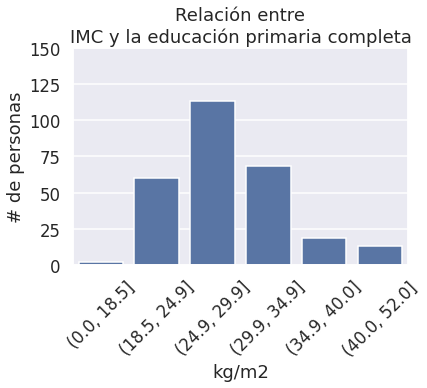

In [242]:
plt.title("Relación entre\nIMC y la educación primaria completa")
sns.set_context(context='talk', font_scale=1)
sns.countplot(data=con_pc, x="i_imc", color="b")
plt.ylim(0,150)
plt.xticks(rotation=45);
plt.xlabel('kg/m2')
plt.ylabel("# de personas")

con_pc.i_imc.value_counts().reset_index()

,index,i_imc
0,"(24.9, 29.9]",0.410909
1,"(29.9, 34.9]",0.247273
2,"(18.5, 24.9]",0.218182
3,"(34.9, 40.0]",0.069091
4,"(40.0, 52.0]",0.047273
5,"(0.0, 18.5]",0.007273


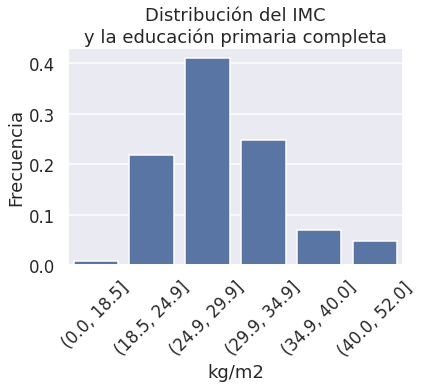

In [333]:
n_con_pc=con_pc.i_imc.value_counts(normalize=True).reset_index()

plt.title("Distribución del IMC\ny la educación primaria completa")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=n_con_pc, x="index", y="i_imc", color="b")
plt.xticks(rotation=45);
plt.xlabel('kg/m2')
plt.ylabel("Frecuencia")

n_con_pc

### Conclusión: La probabilidad condicional de tener un IMC Normal, dado que tenes estudios primarios es 21.8%. Por lo que la probabilidad de tener un IMC alterado (bajo, pre-obesidad, obeso tipo 1, tipo2 y tipo 3) es de 78.2%.


## Vamos a evaluar si esto cambio, segun el sexo

,index,i_imc
0,"(24.9, 29.9]",113
1,"(29.9, 34.9]",68
2,"(18.5, 24.9]",60
3,"(34.9, 40.0]",19
4,"(40.0, 52.0]",13
5,"(0.0, 18.5]",2


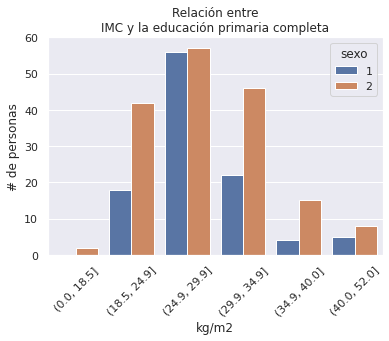

In [268]:
# vamos a ver por sexo

plt.title("Relación entre\nIMC y la educación primaria completa")
sns.set_context(context='talk', font_scale=1)
sns.set(style="darkgrid")
sns.countplot(data=con_pc, x="i_imc", hue="sexo")
plt.ylim(0,60)
plt.xticks(rotation=45);
plt.xlabel('kg/m2')
plt.ylabel("# de personas")

con_pc.i_imc.value_counts().reset_index()

In [319]:
con_pc_muj=con_pc[con_pc.sexo == 2.0]
con_pc_muj.head()

,sexo,IMC,eent,actfis,edad,i_imc,i_edad
2,2,34.000000,1,2.0,61,"(29.9, 34.9]",58-67
14,2,42.608566,1,1.0,61,"(40.0, 52.0]",58-67
15,2,30.527914,1,1.0,70,"(29.9, 34.9]",68-77
29,2,33.412004,1,1.0,70,"(29.9, 34.9]",68-77
32,2,25.674931,1,1.0,69,"(24.9, 29.9]",68-77


,index,i_imc
0,"(24.9, 29.9]",57
1,"(29.9, 34.9]",46
2,"(18.5, 24.9]",42
3,"(34.9, 40.0]",15
4,"(40.0, 52.0]",8
5,"(0.0, 18.5]",2


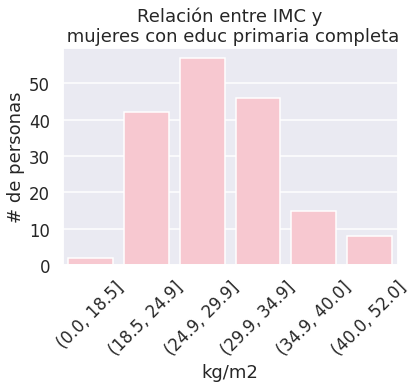

In [341]:
plt.title("Relación entre IMC y\n mujeres con educ primaria completa")
sns.set_context(context='talk', font_scale=1)
sns.countplot(data=con_pc_muj, x="i_imc", color="pink")
plt.ylim()
plt.xticks(rotation=45);
plt.xlabel('kg/m2')
plt.ylabel("# de personas")

con_pc_muj.i_imc.value_counts().reset_index()

,index,i_imc
0,"(24.9, 29.9]",0.335294
1,"(29.9, 34.9]",0.270588
2,"(18.5, 24.9]",0.247059
3,"(34.9, 40.0]",0.088235
4,"(40.0, 52.0]",0.047059
5,"(0.0, 18.5]",0.011765


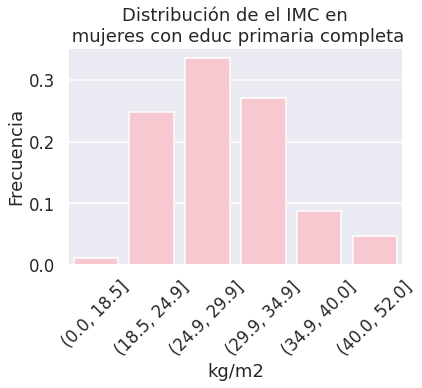

In [342]:
n_con_pc_muj=con_pc_muj.i_imc.value_counts(normalize=True).reset_index()

plt.title("Distribución de el IMC en\n mujeres con educ primaria completa")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=n_con_pc_muj, x="index", y="i_imc",color="pink")
plt.ylim()
plt.xticks(rotation=45);
plt.xlabel('kg/m2')
plt.ylabel("Frecuencia")

n_con_pc_muj

Conclusión: La probabilidad condicional de tener un IMC Normal, dado que tenes estudios primarios y sexo femenino es 24.7%. Por lo que la probabilidad de tener un IMC alterado (bajo, pre-obesidad, obeso tipo 1, tipo2 y tipo 3) es de 75.3%.

En hombres

In [334]:
con_pc_mas=con_pc[con_pc.sexo == 1.0]
con_pc_mas.head()

,sexo,IMC,eent,actfis,edad,i_imc,i_edad
3,1,23.243408,1,1.0,80,"(18.5, 24.9]",78-87
20,1,26.318367,1,2.0,35,"(24.9, 29.9]",28-37
52,1,28.900283,1,2.0,49,"(24.9, 29.9]",48-57
82,1,27.787755,1,2.0,71,"(24.9, 29.9]",68-77
100,1,25.909457,1,1.0,60,"(24.9, 29.9]",58-67


,index,i_imc
0,"(24.9, 29.9]",56
1,"(29.9, 34.9]",22
2,"(18.5, 24.9]",18
3,"(40.0, 52.0]",5
4,"(34.9, 40.0]",4
5,"(0.0, 18.5]",0


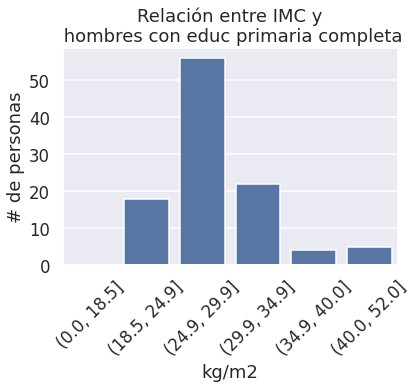

In [336]:
plt.title("Relación entre IMC y\n hombres con educ primaria completa")
sns.set_context(context='talk', font_scale=1)
sns.countplot(data=con_pc_mas, x="i_imc", color="b")
plt.ylim()
plt.xticks(rotation=45);
plt.xlabel('kg/m2')
plt.ylabel("# de personas")

con_pc_mas.i_imc.value_counts().reset_index()

,index,i_imc
0,"(24.9, 29.9]",0.533333
1,"(29.9, 34.9]",0.209524
2,"(18.5, 24.9]",0.171429
3,"(40.0, 52.0]",0.047619
4,"(34.9, 40.0]",0.038095
5,"(0.0, 18.5]",0.000000


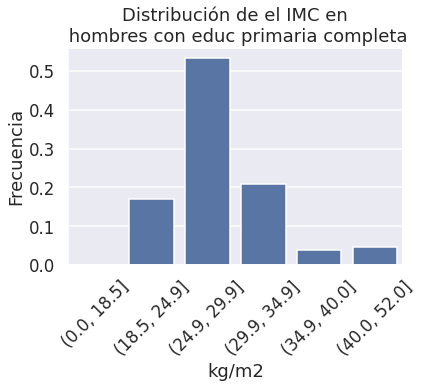

In [343]:
n_con_pc_mas=con_pc_mas.i_imc.value_counts(normalize=True).reset_index()

plt.title("Distribución de el IMC en\n hombres con educ primaria completa")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=n_con_pc_mas, x="index", y="i_imc",color="b")
plt.ylim()
plt.xticks(rotation=45);
plt.xlabel('kg/m2')
plt.ylabel("Frecuencia")

n_con_pc_mas

Conclusión: La probabilidad condicional de tener un IMC Normal, dado que tenes estudios primarios y sexo masculino es 17.1%. Por lo que la probabilidad de tener un IMC alterado (bajo, pre-obesidad, obeso tipo 1, tipo2 y tipo 3) es de 82.9%.

## Evaluacion de la distribucion de las va
Voy a Evaluar IMC vs Educacion del entrevistado (eent)
primero veo si tienen distribucion normal o no

In [344]:
from scipy import stats
"""
Voy a Evaluar IMC vs Educacion del entrevistado (eent)
primero veo si tienen distribucion normal o no
"""
df = obedf[['IMC','eent', 'sexo', 'edad', 'actfis', 'stress' ]]


IMC = df.loc[:,'IMC'].to_numpy()
R_IMC = stats.kstest(IMC, 'norm')
print ('El Estadistico KS para \"IMC\"" es: ', R_IMC[0])
print ('El p-valor para \"IMC\"" es: ', R_IMC[1])
print()


eent = df.loc[:,'eent'].to_numpy()
R_eent = stats.kstest(eent, 'norm')
print ('El Estadistico KS para \"eent\"" es: ', R_eent[0])
print ('El p-valor para \"eent\"" es: ', R_eent[1])
print()

if (R_IMC[1]<0.05):
    print('\"IMC\"" tiene distribucion NO NORMAL') 
else:
    print('\" IMC\"" tiene distribucion NORMAL')

if (R_eent[1] < 0.05): 
    print('\"eent\"" tiene distribucion NO NORMAL')
else: 
    print('\" eent\"" tiene distribucion NORMAL')

roKS,p =  stats.kstest(eent, 'norm')
print(p)    

El Estadistico KS para "IMC"" es:  1.0
El p-valor para "IMC"" es:  0.0

El Estadistico KS para "eent"" es:  0.9131771746687826
El p-valor para "eent"" es:  0.0

"IMC"" tiene distribucion NO NORMAL
"eent"" tiene distribucion NO NORMAL
0.0


In [345]:
C = [IMC,eent]
df_IMC_eent = pd.DataFrame(C)
df_IMC_eent.index = ['IMC','eent']
df_IMC_eent

roS, p_valueS = stats.spearmanr(eent, IMC)

tauK, p_valueK = stats.kendalltau(IMC,eent)

print('Spearman roS =' , roS,', p-value =', p_valueS)
print()
#print('Kendall tauK =', tauK, ', p-value =', p_valueK)

Spearman roS = -0.21339217318790546 , p-value = 2.1799063810378494e-45



#Estudio de relaciones de las variables
##IMC vs eent

Legenda:
1-primario incompleto
2-primario completo
3-secundario incompleto
4-secundario completo
5-terciario
6-universitario
7-postgrado
9-universitario incompleto


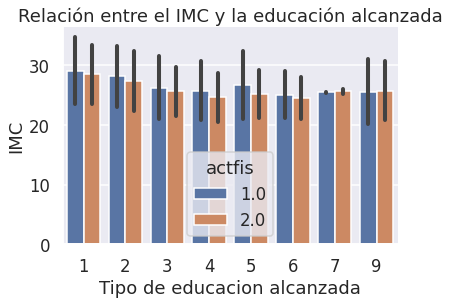

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds, y="IMC", x="eent", hue="actfis", ci="sd") 
plt.title("Relación entre el IMC y la educación alcanzada")
sns.despine()
plt.xlabel('Tipo de educacion alcanzada')
plt.ylabel("IMC")

print("Legenda:\n1-primario incompleto\n2-primario completo\n3-secundario incompleto\n4-secundario completo\n5-terciario\n6-universitario\n7-postgrado\n9-universitario incompleto")

Legenda:
1-primario incompleto
2-primario completo
3-secundario incompleto
4-secundario completo
5-terciario
6-universitario
7-postgrado
9-universitario incompleto


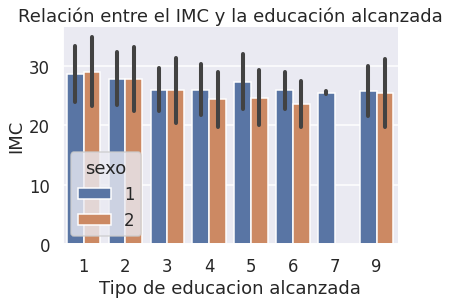

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds, y="IMC", x="eent", hue="sexo", ci="sd") 
plt.title("Relación entre el IMC y la educación alcanzada")
sns.despine()
plt.xlabel('Tipo de educacion alcanzada')
plt.ylabel("IMC")
print("Legenda:\n1-primario incompleto\n2-primario completo\n3-secundario incompleto\n4-secundario completo\n5-terciario\n6-universitario\n7-postgrado\n9-universitario incompleto")

## IMC vs sexo

Text(0, 0.5, 'IMC')

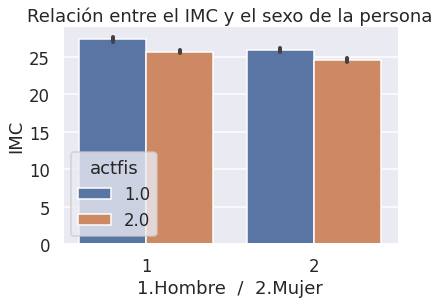

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds, y="IMC", x="sexo", hue="actfis")
plt.title("Relación entre el IMC y el sexo de la persona")
sns.despine()
plt.xlabel('1.Hombre  /  2.Mujer')
plt.ylabel("IMC")


## IMC vs stress - lo dejo, no perdemos nada

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds, y="IMC", x="stress")
plt.title("Relación entre el IMC y el stress")
sns.despine()
plt.xlabel("Nivel de Stress")
plt.ylabel("IMC")

ValueError: ignored

In [ ]:
sns.set(style="darkgrid")
sns.set_context(context='talk', font_scale=1)
sns.barplot(data=ds, y="IMC", x="stress", hue="sexo")
plt.title("Relación entre el IMC y el stress")
sns.despine()
plt.xlabel("Nivel de Stress")
plt.ylabel("IMC")

## Pairplot

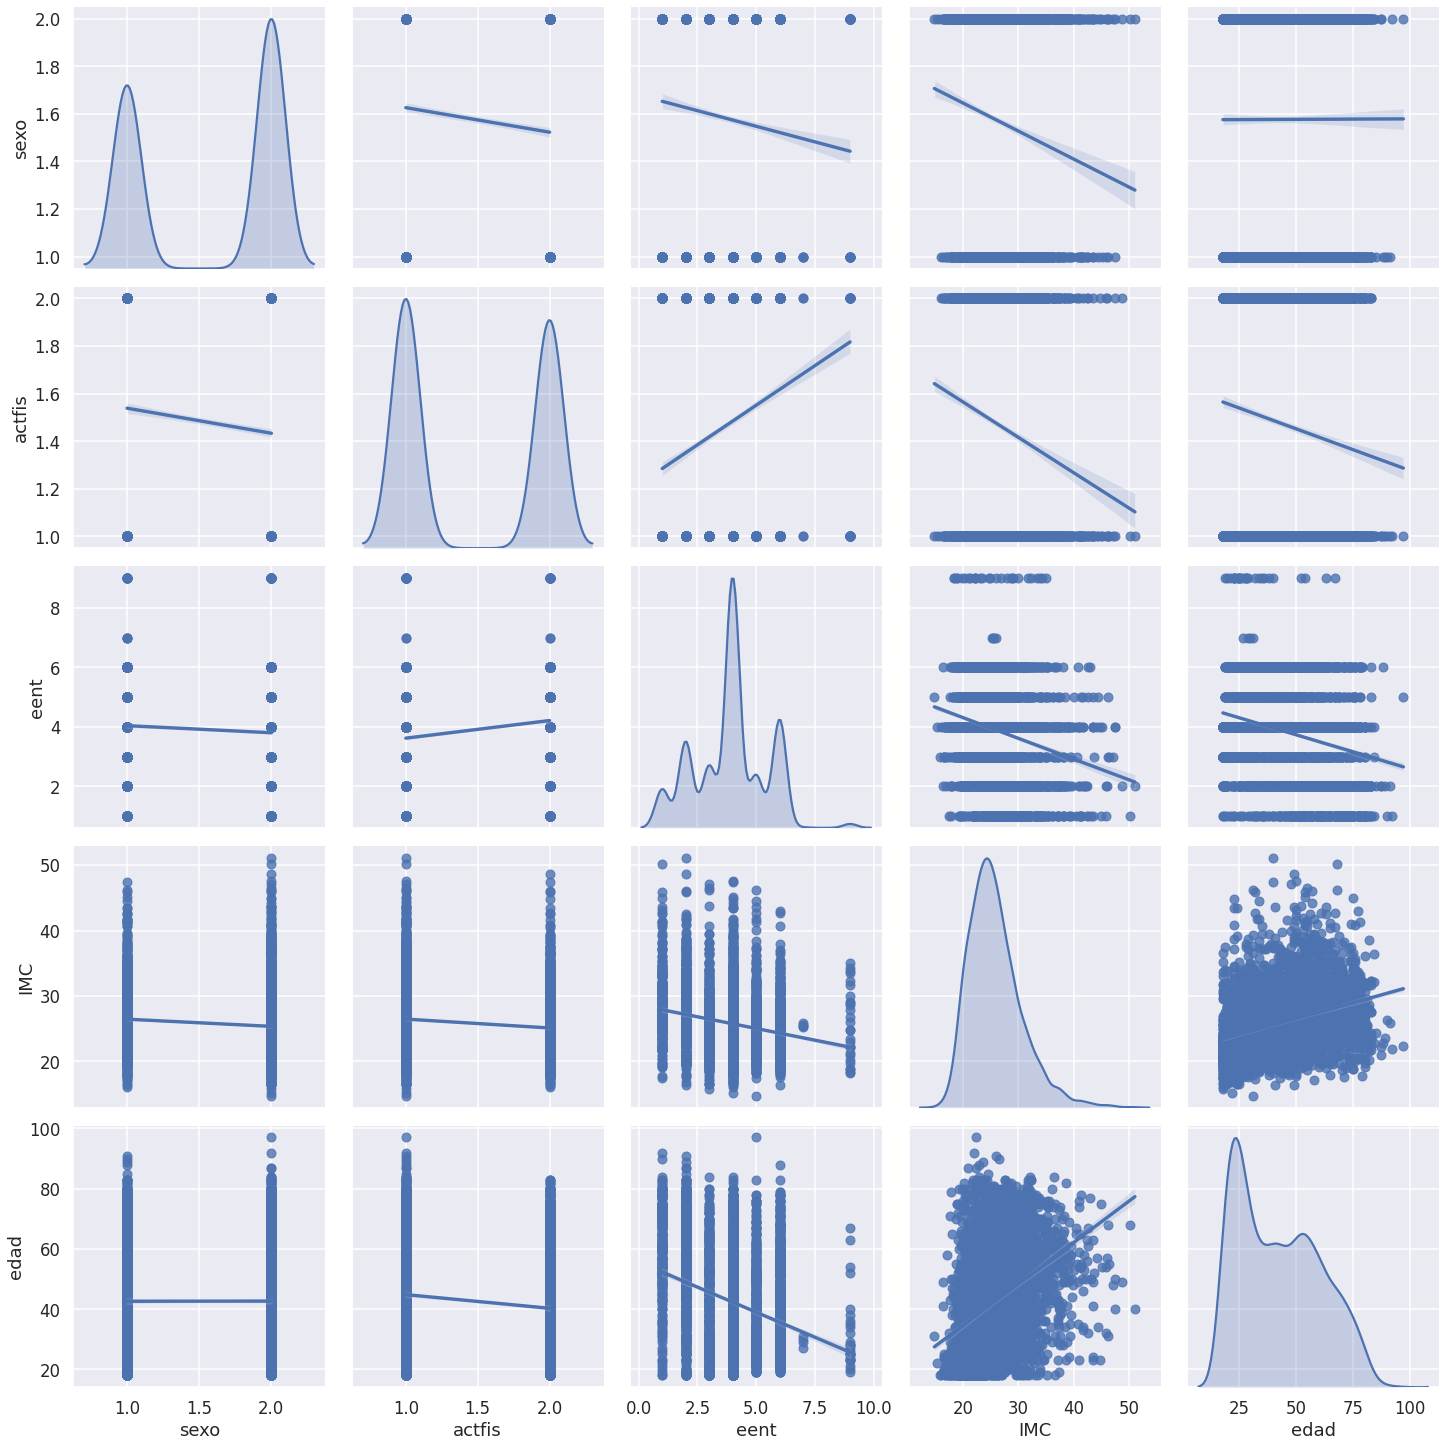

In [133]:
sns.pairplot(data=ds, vars=['sexo', 'actfis', 'eent', "IMC", "edad"], height=4, diag_kind="kde",kind="reg")

##**Conclusiones**:

Respescto a sexo (hom vs muj): las mujeres se correlaciona con mas stress, menor IMC, ,menor eent y menor actfis. No se aprecia correlacion con la edad.

ACTFIS: hacer actf (2.0) se correlaciona con edades mas tempreanas, menor imc, menor en mujeres, mas en altos ennt

EENT: mayor eent se correlaciona  con edades mas tempreanas, menor imc, mayor stress y act fis, y es menor en mujeres, 

IMC: menor IMC se correlaciona con edades mas tempreanas, mayor eent, act fis y hombres.

edad: mayor edad se correlaciona con mayor imc, menor ennt, menor act fis. 
No hay correlacion con el sexo de los encuestados.

stress: menor stress, menor imc, eent, hombre mayor act fis

##conclusiones definitivas:

Teniendo en cuenta que el IMC ayuda a definir el estado de obesidad, vemos que existe una correlacion positiva entre IMC y la edad. Ademas vemos una correlacion negativa entre IMC y la act fisica y la educacion alcanzada.
El IMC es menor en mujeres. 
